In [3]:
#Normal equation to get coefficients

import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

## Gradient Descent 

- Compute the gradient of the cost function

In [6]:
# Batch Griadient Descent

eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [8]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [9]:
theta

array([[4.14684283],
       [2.97916105]])

## Learning Rates

In [73]:

X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.xlabel('Training_Set_Size')
    plt.ylabel('RMSE')
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='val')
    plt.legend()

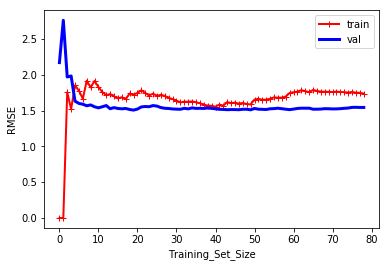

In [83]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


 ## Polynomial Regression

In [90]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [91]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("sgd_reg", LinearRegression()),
))

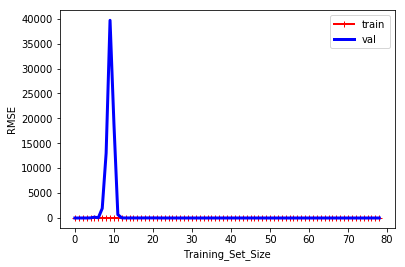

In [93]:
plot_learning_curves(polynomial_regression, X, y)

 ## Ridge Regression


In [111]:
#Closed form
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.52817211]])

In [116]:
#Stochastic Gradient Descent with l2
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([3.39460816])

## Lasso Rigresssion


In [117]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.47462147])

In [115]:
#Stochastic Gradient Descent with l1
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([3.40224048])

## Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term
is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When
r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression


So when should you use Linear Regression, Ridge, Lasso, or Elastic Net? It is almost always preferable
to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge
is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or
Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In
general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of
features is greater than the number of training instances or when several features are strongly correlated.

In [122]:
from sklearn.linear_model import ElasticNet
#l1-ratio =  mix ratio r
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.48330759])

## Early stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop
training as soon as the validation error reaches a minimum. This is called early stopping.

In [126]:
# example model

from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                        learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train_poly_scaled' is not defined

## Logistic Regression

In [133]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [135]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [137]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

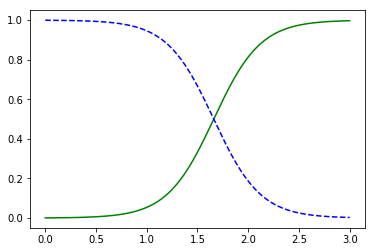

In [139]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

## Softmax Regression

Logistic regression can be generalized to support mutliple classes directly without having to train and combine multiple binary classifiers

In [141]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

# switching multi_class to multinomial switches logistic regerssion to softmax
# solver = lbfgs supports softmax
# c applies l2 regularization, the higher the value of c, the less the regularization}

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])